In [1]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from math import floor,ceil,sqrt
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Microsoft_Stock.csv to Microsoft_Stock (2).csv


In [4]:
df = pd.read_csv('Microsoft_Stock.csv')
df.head(15)

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438
5,4/9/2015 16:00:00,41.25,41.62,41.25,41.48,25723861
6,4/10/2015 16:00:00,41.63,41.95,41.41,41.72,28022002
7,4/13/2015 16:00:00,41.40,42.06,41.39,41.76,30276692
8,4/14/2015 16:00:00,41.80,42.03,41.39,41.65,24244382
9,4/15/2015 16:00:00,41.76,42.46,41.68,42.26,27343581


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


In [6]:
df.isnull()

,Date,Open,High,Low,Close,Volume
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1506,False,False,False,False,False,False
1507,False,False,False,False,False,False
1508,False,False,False,False,False,False
1509,False,False,False,False,False,False


**The Graph of Dataset**

Text(0.5, 1.0, 'Stock Price of Microsoft over the Years')

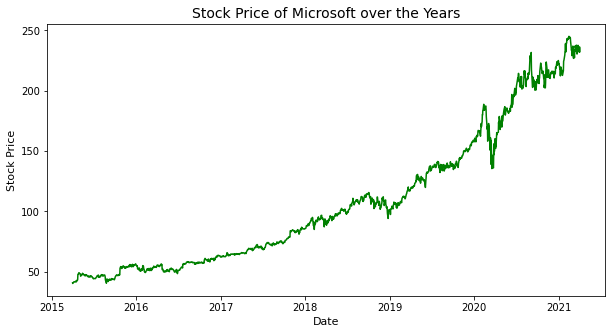

In [7]:
df['Date'] = pd.to_datetime(df.Date,format='%m/%d/%Y %H:%M:%S')
df.index = df['Date']
plt.figure(figsize=(10,5))
plt.plot(df['Close'], label='Close Price history',color='g')
plt.xlabel('Date',size=11)
plt.ylabel('Stock Price',size=11)
plt.title('Stock Price of Microsoft over the Years',size=14)

**Stock Price Prediction by Moving Averages**

-----------STOCK PRICE PREDICTION BY MOVING AVERAGE--------
Shape of Training Set (1134, 1)
Shape of Validation Set (377, 1)
RMSE value on validation set: 76.62376749929759


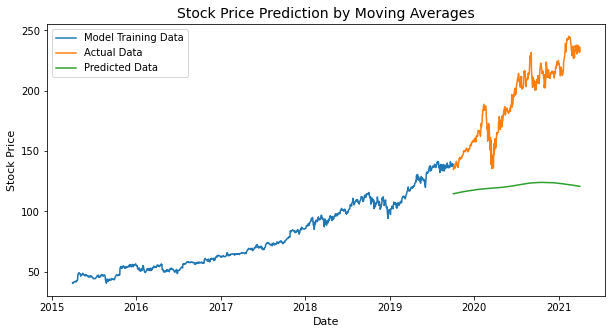

In [8]:
def moving_avg_prediction(df):
    shape=df.shape[0]
    df_new=df[['Close']]
    df_new.head()
    train_set=df_new.iloc[:ceil(shape*0.75)]
    valid_set=df_new.iloc[ceil(shape*0.75):]
    print('-----------STOCK PRICE PREDICTION BY MOVING AVERAGE--------')
    print('===========================================================')
    print('Shape of Training Set',train_set.shape)
    print('Shape of Validation Set',valid_set.shape)
    preds = []
    for i in range(0,valid_set.shape[0]):
        a = train_set['Close'][len(train_set)-valid_set.shape[0]+i:].sum() + sum(preds)
        b = a/(valid_set.shape[0])
        preds.append(b)
    rms=np.sqrt(np.mean(np.power((np.array(valid_set['Close'])-preds),2)))
    print('RMSE value on validation set:',rms)
    print('===========================================================')
    valid_set['Predictions'] = preds
    plt.figure(figsize=(10,5))
    plt.plot(train_set['Close'])
    plt.plot(valid_set[['Close', 'Predictions']])
    plt.xlabel('Date',size=11)
    plt.ylabel('Stock Price',size=11)
    plt.title('Stock Price Prediction by Moving Averages',size=14)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])


moving_avg_prediction(df)

**Stock Price Prediction by Linear Regression**

--------STOCK PRICE PREDICTION BY LINEAR REGRESSION--------
Shape of Training Set (1134, 1)
Shape of Validation Set (377, 1)
RMSE value on validation set: 58.36609230803357


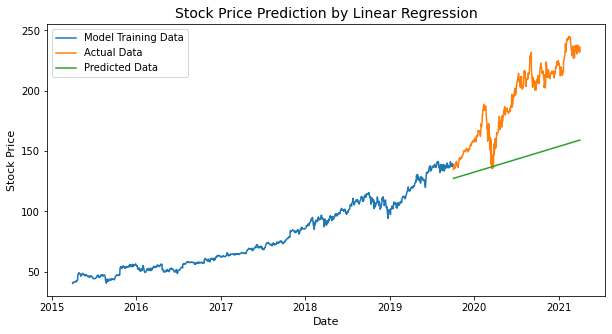

In [9]:
from sklearn.linear_model import LinearRegression
def linear_regression_prediction(df):
    shape=df.shape[0]
    df_new=df[['Close']]
    df_new.head()
    train_set=df_new.iloc[:ceil(shape*0.75)]
    valid_set=df_new.iloc[ceil(shape*0.75):]
    print('--------STOCK PRICE PREDICTION BY LINEAR REGRESSION--------')
    print('===========================================================')
    print('Shape of Training Set',train_set.shape)
    print('Shape of Validation Set',valid_set.shape)
    train=train_set.reset_index()
    valid=valid_set.reset_index()
    x_train = train['Date'].map(dt.datetime.toordinal)
    y_train = train[['Close']]
    x_valid = valid['Date'].map(dt.datetime.toordinal)
    y_valid = valid[['Close']]
    #implement linear regression
    model = LinearRegression()
    model.fit(np.array(x_train).reshape(-1,1),y_train)
    preds = model.predict(np.array(x_valid).reshape(-1,1))
    rms=np.sqrt(np.mean(np.power((np.array(valid_set['Close'])-preds),2)))
    print('RMSE value on validation set:',rms)
    print('===========================================================')
    valid_set['Predictions'] = preds
    plt.figure(figsize=(10,5))
    plt.plot(train_set['Close'])
    plt.plot(valid_set[['Close', 'Predictions']])
    plt.xlabel('Date',size=11)
    plt.ylabel('Stock Price',size=11)
    plt.title('Stock Price Prediction by Linear Regression',size=14)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])


linear_regression_prediction(df)

**Stock Price Prediction by DecisionTreeRegressor**

-----STOCK PRICE PREDICTION BY DecisionTreeRegressor-------
Shape of Training Set (1134, 1)
Shape of Validation Set (377, 1)
RMSE value on validation set: 62.85963457486802


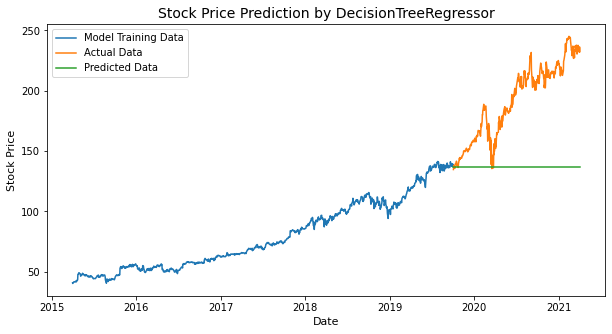

In [10]:
from sklearn.tree import DecisionTreeRegressor
def linear_regression_prediction(df):
    shape=df.shape[0]
    df_new=df[['Close']]
    df_new.head()
    train_set=df_new.iloc[:ceil(shape*0.75)]
    valid_set=df_new.iloc[ceil(shape*0.75):]
    print('-----STOCK PRICE PREDICTION BY DecisionTreeRegressor-------')
    print('===========================================================')
    print('Shape of Training Set',train_set.shape)
    print('Shape of Validation Set',valid_set.shape)
    train=train_set.reset_index()
    valid=valid_set.reset_index()
    x_train = train['Date'].map(dt.datetime.toordinal)
    y_train = train[['Close']]
    x_valid = valid['Date'].map(dt.datetime.toordinal)
    y_valid = valid[['Close']]
    #implement linear regression
    model = DecisionTreeRegressor()
    model.fit(np.array(x_train).reshape(-1, 1),(y_train))
    preds = model.predict(np.array(x_valid).reshape(-1,1))
    rms=np.sqrt(np.mean(np.power((np.array(valid_set['Close'])-preds),2)))
    print('RMSE value on validation set:',rms)
    print('===========================================================')
    valid_set['Predictions'] = preds
    plt.figure(figsize=(10,5))
    plt.plot(train_set['Close'])
    plt.plot(valid_set[['Close', 'Predictions']])
    plt.xlabel('Date',size=11)
    plt.ylabel('Stock Price',size=11)
    plt.title('Stock Price Prediction by DecisionTreeRegressor',size=14)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])


linear_regression_prediction(df)

**Stock Price Prediction by RandomForestRegressor**

-----STOCK PRICE PREDICTION BY RandomForestRegressor-------
Shape of Training Set (1134, 1)
Shape of Validation Set (377, 1)
RMSE value on validation set: 62.18385199080742


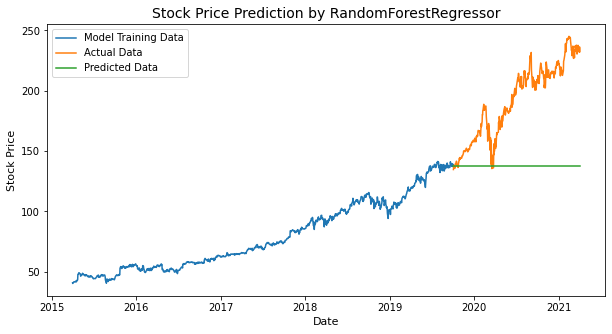

In [11]:
from sklearn.ensemble import RandomForestRegressor
def linear_regression_prediction(df):
    shape=df.shape[0]
    df_new=df[['Close']]
    df_new.head()
    train_set=df_new.iloc[:ceil(shape*0.75)]
    valid_set=df_new.iloc[ceil(shape*0.75):]
    print('-----STOCK PRICE PREDICTION BY RandomForestRegressor-------')
    print('===========================================================')
    print('Shape of Training Set',train_set.shape)
    print('Shape of Validation Set',valid_set.shape)
    train=train_set.reset_index()
    valid=valid_set.reset_index()
    x_train = train['Date'].map(dt.datetime.toordinal)
    y_train = train[['Close']]
    x_valid = valid['Date'].map(dt.datetime.toordinal)
    y_valid = valid[['Close']]
    #implement RandomForestRegressor
    model = RandomForestRegressor()
    model.fit(np.array(x_train).reshape(-1, 1),(y_train.values.ravel()))
    preds = model.predict(np.array(x_valid).reshape(-1,1))
    rms=np.sqrt(np.mean(np.power((np.array(valid_set['Close'])-preds),2)))
    print('RMSE value on validation set:',rms)
    print('===========================================================')
    valid_set['Predictions'] = preds
    plt.figure(figsize=(10,5))
    plt.plot(train_set['Close'])
    plt.plot(valid_set[['Close', 'Predictions']])
    plt.xlabel('Date',size=11)
    plt.ylabel('Stock Price',size=11)
    plt.title('Stock Price Prediction by RandomForestRegressor',size=14)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])


linear_regression_prediction(df)

**Stock Price Prediction by SVR**

--------------STOCK PRICE PREDICTION BY SVR----------------
Shape of Training Set (1134, 1)
Shape of Validation Set (377, 1)
RMSE value on validation set: 121.53280106503823


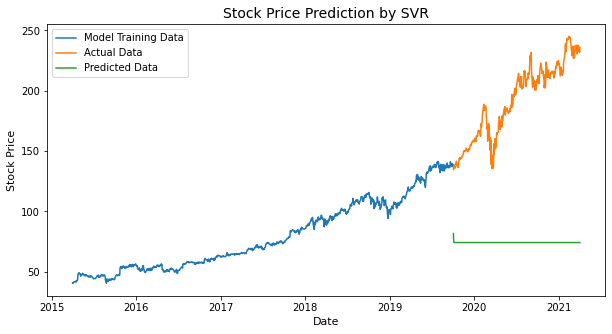

In [12]:
from sklearn.svm import SVR
def linear_regression_prediction(df):
    shape=df.shape[0]
    df_new=df[['Close']]
    df_new.head()
    train_set=df_new.iloc[:ceil(shape*0.75)]
    valid_set=df_new.iloc[ceil(shape*0.75):]
    print('--------------STOCK PRICE PREDICTION BY SVR----------------')
    print('===========================================================')
    print('Shape of Training Set',train_set.shape)
    print('Shape of Validation Set',valid_set.shape)
    train=train_set.reset_index()
    valid=valid_set.reset_index()
    x_train = train['Date'].map(dt.datetime.toordinal)
    y_train = train[['Close']]
    x_valid = valid['Date'].map(dt.datetime.toordinal)
    y_valid = valid[['Close']]
    #implement SVR
    model = SVR(kernel='rbf',gamma=0.5, C=10, epsilon = 0.05)
    model.fit(np.array(x_train).reshape(-1, 1),(y_train.values.ravel()))
    preds = model.predict(np.array(x_valid).reshape(-1,1))
    rms=np.sqrt(np.mean(np.power((np.array(valid_set['Close'])-preds),2)))
    print('RMSE value on validation set:',rms)
    print('===========================================================')
    valid_set['Predictions'] = preds
    plt.figure(figsize=(10,5))
    plt.plot(train_set['Close'])
    plt.plot(valid_set[['Close', 'Predictions']])
    plt.xlabel('Date',size=11)
    plt.ylabel('Stock Price',size=11)
    plt.title('Stock Price Prediction by SVR',size=14)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])


linear_regression_prediction(df)

**Stock Price Prediction by K-Nearest Neighbors**

------STOCK PRICE PREDICTION BY K-NEAREST NEIGHBORS--------
Shape of Training Set (1134, 1)
Shape of Validation Set (377, 1)
RMSE value on validation set: 112.9467566922719


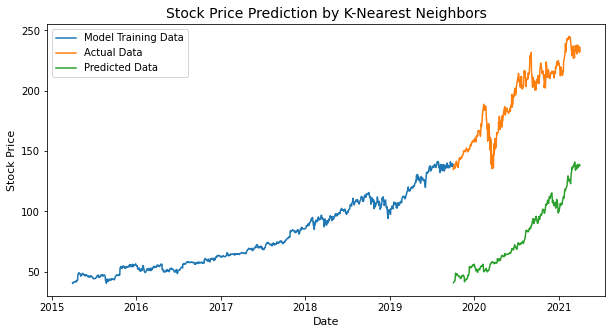

In [13]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
def k_nearest_neighbours_predict(df):
    shape=df.shape[0]
    df_new=df[['Close']]
    df_new.head()
    train_set=df_new.iloc[:ceil(shape*0.75)]
    valid_set=df_new.iloc[ceil(shape*0.75):]
    print('------STOCK PRICE PREDICTION BY K-NEAREST NEIGHBORS--------')
    print('===========================================================')
    print('Shape of Training Set',train_set.shape)
    print('Shape of Validation Set',valid_set.shape)
    train=train_set.reset_index()
    valid=valid_set.reset_index()
    x_train = train['Date'].map(dt.datetime.toordinal)
    y_train = train[['Close']]
    x_valid = valid['Date'].map(dt.datetime.toordinal)
    y_valid = valid[['Close']]
    x_train_scaled = scaler.fit_transform(np.array(x_train).reshape(-1, 1))
    x_train = pd.DataFrame(x_train_scaled)
    x_valid_scaled = scaler.fit_transform(np.array(x_valid).reshape(-1, 1))
    x_valid = pd.DataFrame(x_valid_scaled)
    params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
    knn = neighbors.KNeighborsRegressor()
    model = GridSearchCV(knn, params, cv=5)
    model.fit(x_train,y_train)
    preds = model.predict(x_valid)
    rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
    print('RMSE value on validation set:',rms)
    print('===========================================================')
    valid_set['Predictions'] = preds
    plt.figure(figsize=(10,5))
    plt.plot(train_set['Close'])
    plt.plot(valid_set[['Close', 'Predictions']])
    plt.xlabel('Date',size=11)
    plt.ylabel('Stock Price',size=11)
    plt.title('Stock Price Prediction by K-Nearest Neighbors',size=14)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])

k_nearest_neighbours_predict(df)

**Stock Price Prediction by Auto ARIMA**

-----------STOCK PRICE PREDICTION BY AUTO ARIMA------------
Shape of Training Set (1134, 6)
Shape of Validation Set (377, 6)
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=6.61 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4440.431, Time=0.16 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4126.393, Time=0.72 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=8.51 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=4427.420, Time=0.31 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=3999.903, Time=2.45 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=15.65 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=8.17 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=4015.175, Time=1.66 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=3983.513, Time=2.33 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=4107.542, Time=1.27 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=13.32 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Tim

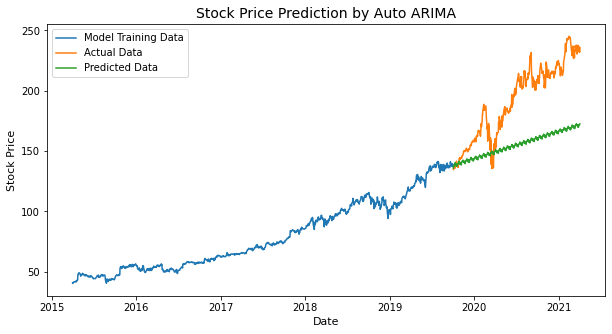

In [14]:
from pmdarima.arima import auto_arima
def auto_arima_prediction(df):
    shape=df.shape[0]
    df_new=df
    data = df_new.sort_index(ascending=True, axis=0)
    train_set=data[:ceil(shape*0.75)]
    valid_set=data[ceil(shape*0.75):]
    print('-----------STOCK PRICE PREDICTION BY AUTO ARIMA------------')
    print('===========================================================')
    print('Shape of Training Set',train_set.shape)
    print('Shape of Validation Set',valid_set.shape)
    training = train_set['Close']
    validation = valid_set['Close']
    model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
    model.fit(training)
    forecast = model.predict(n_periods=ceil(floor(df.shape[0]*0.25)))
    forecast = pd.DataFrame(forecast,index = valid_set.index,columns=['Prediction'])
    rms=np.sqrt(np.mean(np.power((np.array(valid_set['Close'])-np.array(forecast['Prediction'])),2)))
    print('RMSE value on validation set:',rms)
    print('===========================================================')
    plt.figure(figsize=(10,5))
    plt.plot(train_set['Close'])
    plt.plot(valid_set['Close'])
    plt.plot(forecast['Prediction'])
    plt.xlabel('Date',size=11)
    plt.ylabel('Stock Price',size=11)
    plt.title('Stock Price Prediction by Auto ARIMA',size=14)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])

auto_arima_prediction(df)

**Stock Price Prediction by Long Short Term Memory (LSTM)**

--STOCK PRICE PREDICTION BY LONG SHORT TERM MEMORY (LSTM)--
Shape of Training Set (1134, 1)
Shape of Validation Set (377, 1)
1094/1094 - 21s - loss: 7.6967e-04 - 21s/epoch - 19ms/step
RMSE value on validation set: Close    7.480144
dtype: float64


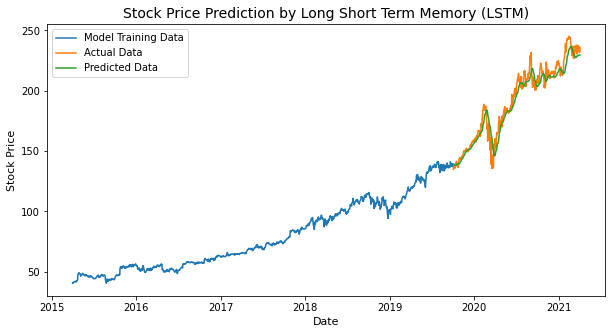

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
def lstm_prediction(df):
    shape=df.shape[0]
    df_new=df[['Close']]
    df_new.head()
    dataset = df_new.values
    train=df_new[:ceil(shape*0.75)]
    valid=df_new[ceil(shape*0.75):]
    print('--STOCK PRICE PREDICTION BY LONG SHORT TERM MEMORY (LSTM)--')
    print('===========================================================')
    print('Shape of Training Set',train.shape)
    print('Shape of Validation Set',valid.shape)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)
    x_train, y_train = [], []
    for i in range(40,len(train)):
        x_train.append(scaled_data[i-40:i,0])
        y_train.append(scaled_data[i,0])
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
    model.add(LSTM(units=50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)
    inputs = df_new[len(df_new) - len(valid) - 40:].values
    inputs = inputs.reshape(-1,1)
    inputs  = scaler.transform(inputs)
    X_test = []
    for i in range(40,inputs.shape[0]):
        X_test.append(inputs[i-40:i,0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    closing_price = model.predict(X_test)
    closing_price = scaler.inverse_transform(closing_price)
    rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
    print('RMSE value on validation set:',rms)
    print('===========================================================')
    valid['Predictions'] = closing_price
    plt.figure(figsize=(10,5))
    plt.plot(train['Close'])
    plt.plot(valid[['Close','Predictions']])
    plt.xlabel('Date',size=11)
    plt.ylabel('Stock Price',size=11)
    plt.title('Stock Price Prediction by Long Short Term Memory (LSTM)',size=14)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])



lstm_prediction(df)

--STOCK PRICE PREDICTION BY LONG SHORT TERM MEMORY (LSTM)--
Shape of Training Set (1134, 1)
Shape of Validation Set (377, 1)
Epoch 1/20
110/110 - 17s - loss: 0.0012 - 17s/epoch - 159ms/step
Epoch 2/20
110/110 - 14s - loss: 1.4033e-04 - 14s/epoch - 126ms/step
Epoch 3/20
110/110 - 14s - loss: 1.3353e-04 - 14s/epoch - 123ms/step
Epoch 4/20
110/110 - 14s - loss: 1.3791e-04 - 14s/epoch - 125ms/step
Epoch 5/20
110/110 - 14s - loss: 1.0735e-04 - 14s/epoch - 124ms/step
Epoch 6/20
110/110 - 13s - loss: 1.7738e-04 - 13s/epoch - 121ms/step
Epoch 7/20
110/110 - 13s - loss: 9.1561e-05 - 13s/epoch - 122ms/step
Epoch 8/20
110/110 - 13s - loss: 1.6745e-04 - 13s/epoch - 119ms/step
Epoch 9/20
110/110 - 13s - loss: 1.2626e-04 - 13s/epoch - 120ms/step
Epoch 10/20
110/110 - 13s - loss: 2.1728e-04 - 13s/epoch - 120ms/step
Epoch 11/20
110/110 - 13s - loss: 1.1834e-04 - 13s/epoch - 121ms/step
Epoch 12/20
110/110 - 13s - loss: 1.0478e-04 - 13s/epoch - 120ms/step
Epoch 13/20
110/110 - 13s - loss: 8.4378e-05 - 1

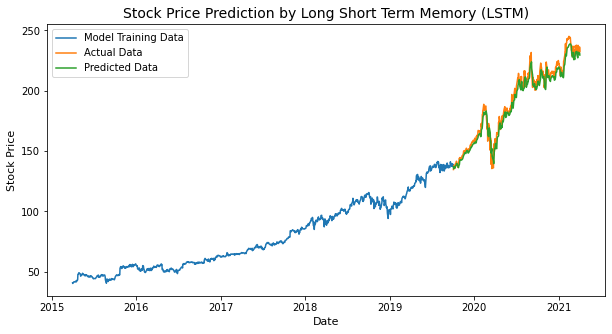

In [16]:
#just changing model items
def lstm_prediction(df):
    shape=df.shape[0]
    df_new=df[['Close']]
    df_new.head()
    dataset = df_new.values
    train=df_new[:ceil(shape*0.75)]
    valid=df_new[ceil(shape*0.75):]
    print('--STOCK PRICE PREDICTION BY LONG SHORT TERM MEMORY (LSTM)--')
    print('===========================================================')
    print('Shape of Training Set',train.shape)
    print('Shape of Validation Set',valid.shape)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)
    x_train, y_train = [], []
    for i in range(40,len(train)):
        x_train.append(scaled_data[i-40:i,0])
        y_train.append(scaled_data[i,0])
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    model= Sequential()
    model.add(LSTM(200,return_sequences=True,input_shape=(x_train.shape[1], 1)))
    model.add(LSTM(200,return_sequences=False))
    model.add(Dense(100))
    model.add(Dense(50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(x_train, y_train, epochs=20, batch_size=10, verbose=2)
    inputs = df_new[len(df_new) - len(valid) - 40:].values
    inputs = inputs.reshape(-1,1)
    inputs  = scaler.transform(inputs)
    X_test = []
    for i in range(40,inputs.shape[0]):
        X_test.append(inputs[i-40:i,0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    closing_price = model.predict(X_test)
    closing_price = scaler.inverse_transform(closing_price)
    rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
    print('RMSE value on validation set:',rms)
    print('===========================================================')
    valid['Predictions'] = closing_price
    plt.figure(figsize=(10,5))
    plt.plot(train['Close'])
    plt.plot(valid[['Close','Predictions']])
    plt.xlabel('Date',size=11)
    plt.ylabel('Stock Price',size=11)
    plt.title('Stock Price Prediction by Long Short Term Memory (LSTM)',size=14)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])



lstm_prediction(df)